# PyCaret 2 Clustering Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
!pip install pycaret

     |████████████████████████████████| 266kB 16.8MB/s 
     |████████████████████████████████| 276kB 47.2MB/s 
     |████████████████████████████████| 14.2MB 273kB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 1.7MB 35.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 215kB 45.7MB/s 
     |████████████████████████████████| 245kB 60.9MB/s 
     |████████████████████████████████| 6.8MB 33.3MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 2.0MB 38.6MB/s 
     |████████████████████████████████| 378kB 47.7MB/s 
     |████████████████████████████████| 163kB 55.7MB/s 
     |████████████████████████████████| 153kB 46.4MB/s 
     |████████████████████████████████| 1.1MB 43.4MB

In [2]:
# check version
from pycaret.utils import version
version()

'2.3.0'

# 1. Loading Dataset

In [ ]:
from pycaret.datasets import get_data
data = get_data('public_health')

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


# 2. Initialize Setup

In [6]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Test_Davivienda/Base_Classification_test.csv'

In [7]:
df = pd.read_csv(path, sep=',')

In [8]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [10]:
from pycaret.clustering import *
clu1 = setup(df, ignore_features = ['ID', 'Z_CostContact', 'Z_Revenue'], session_id=123, log_experiment=True, log_plots = True, 
             experiment_name='health1')

,Description,Value
0,session_id,123
1,Original Data,"(2240, 29)"
2,Missing Values,True
3,Numeric Features,9
4,Categorical Features,16
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(2240, 139)"
9,CPU Jobs,-1


# 3. Create Model

In [11]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [12]:
kmeans = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5444,4966.1157,0.4124,0,0,0


In [13]:
kmodes = create_model('kmodes', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0249,195.9153,2.6504,0,0,0


# 4. Assign Labels

In [14]:
kmeans_results = assign_model(kmeans)
kmeans_results.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,Cluster 0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,Cluster 0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,Cluster 1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,Cluster 3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,Cluster 0


# 5. Analyze Model

In [15]:
plot_model(kmeans)

In [17]:
plot_model(kmeans, feature = 'ID', label=True)

In [18]:
plot_model(kmeans, plot = 'tsne')

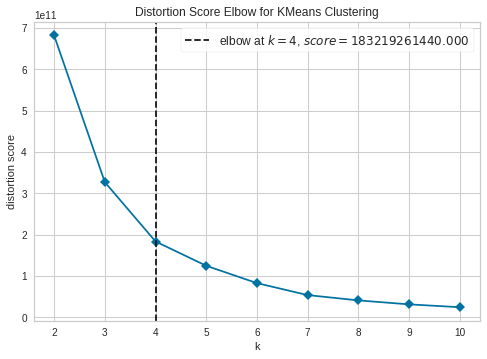

In [19]:
plot_model(kmeans, plot = 'elbow')

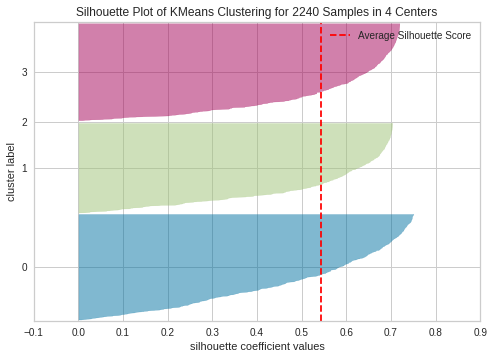

In [20]:
plot_model(kmeans, plot = 'silhouette')

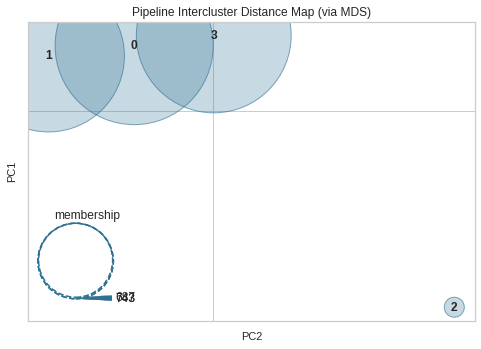

In [21]:
plot_model(kmeans, plot = 'distance')

In [ ]:
plot_model(kmeans, plot = 'distribution')

# 6. Predict Model

In [23]:
pred_new = predict_model(kmeans, data=df)
pred_new.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,Cluster 0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,Cluster 0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,Cluster 1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,Cluster 3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,Cluster 0


# 7. Save / Load Model

In [ ]:
save_model(kmeans, model_name='kmeans')

Transformation Pipeline and Model Succesfully Saved


In [ ]:
loaded_kmeans = load_model('kmeans')
print(loaded_kmeans)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Country Name'],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_...
                                                    target='dummy_target')),
                ('feature_time',
                 Make_Time_Features(list_of_features=None, time_feature=[])),
     

In [ ]:
from sklearn import set_config
set_config(display='diagram')
loaded_kmeans[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Country Name'],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_...
                                                    target='dummy_target')),
                ('feature_time',
                 Make_Time_Features(list_of_features=None, time_feature=[])),
                ('group', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('binn', Empty()),
                ('fix_perfect', Empty()), ('rem_outliers', Empty()),
                ('dummy', Dummify(target='dummy_target')),
                ('clean_names', Clean_Colum_Names()), ('fix_multi', Empty()),
                ('pca', Empty())],
         verbose=False)

In [ ]:
from sklearn import set_config
set_config(display='text')

# 8. Deploy Model

In [ ]:
deploy_model(kmeans, model_name = 'kmeans-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 9. Get Config / Set Config

In [ ]:
X = get_config('X')
X.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,2.314914,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,2.845971,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,4.913629,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,2.346824,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,4.626696,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


In [ ]:
get_config('seed')

123

In [ ]:
from pycaret.clustering import set_config
set_config('seed', 999)

In [ ]:
get_config('seed')

999

# 10. MLFlow UI

In [ ]:
!mlflow ui

^C


# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org